In [1]:
# Problem 3
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# find the gradient of intercept
def intercept_gradient(y,y_predicted):
    gradient = (y_predicted - y)
    return gradient

In [3]:
# find the gradient of weight
def weight_gradient(x,y,y_predicted):
    gradient= x*(y_predicted - y)
    return gradient

In [4]:
# find the predicted value
def predict_y(x,weights,intercept):
    y_predicted = x @ weights + intercept
    return y_predicted

In [5]:
# stochastic gradient descent
def SGD(X,Y):
    m = np.shape(X)[0]   # total number of samples
    n = np.shape(X)[1]   # total number of features
    weights = np.zeros(X.shape[1]) # initialize the weights vector
    intercept = 0     # initialize the intercept
    number_of_iterations = 5000   # total number of steps
    learning_rate = 0.01   # set the learning rate
    square_error = []
    random.seed(265)
    
    for i in range(number_of_iterations):
        r = random.randint(0,14447)  # 14447 is the length of trainning set
        x = X[r]
        y = Y[r]
        y_predicted = predict_y(x,weights,intercept)
        error = y_predicted - y
        se = error**2
        square_error.append(se)
        
        # update weights
        weights = weights - learning_rate * weight_gradient(x,y,y_predicted)
        
        # update intercept
        intercept = intercept - learning_rate * intercept_gradient(y,y_predicted)
        
    # plot a graph of squared error versus numer of updates
    plt.plot(np.arange(1,number_of_iterations),square_error[1:])
    plt.ylim((0,1))
    plt.xlabel("number of updates")
    plt.ylabel("squared error")
    
    return weights,intercept

In [6]:
# import the dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
DF = california_housing.frame
DF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# b & c) choose the independent features as X and choose target feature Y
x = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population',
        'AveOccup','Latitude','Longitude']].values
y = DF[['MedHouseVal']].values

In [8]:
# d) 0 - 1 normalization on X and Y
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [9]:
# randomly split data into trainning and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 265)

Weights: [ 0.77752415  0.11892458  0.03479236  0.00530762  0.00893102 -0.00379474
 -0.13080282 -0.07408918]
Intercept: [0.21669483]
MSE: 0.031076966697939037


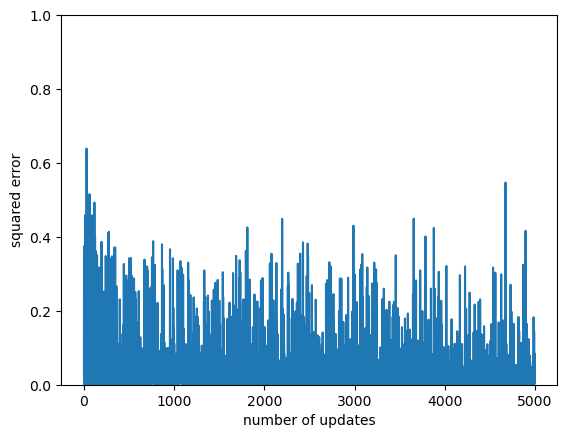

In [10]:
# g) get the best set of parameters
from sklearn.metrics import mean_squared_error
weights,intercept = SGD(x_train,y_train)
print("Weights:",weights)
print("Intercept:", intercept)

# use test set to calculate the MSE
y_predicted = []
for x in x_test:
    yhat = predict_y(x,weights,intercept)
    y_predicted.append(yhat)
print("MSE:",mean_squared_error(y_test,y_predicted))

In [11]:
# h)
# The weights are [ 0.77752415  0.11892458  0.03479236  0.00530762  
#                  0.00893102 -0.00379474  -0.13080282 -0.07408918]
# The intercept are 0.21669483
# From the weights, we can find that MedInc which explain the house prices the most.

In [12]:
# Problem 4

In [13]:
# c) use sklearn SGDRegressor to find the best parameters and intercept
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=5000, alpha = 0.01, random_state = 265)
sgd.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, max_iter=5000, random_state=265)

In [14]:
# d)
print(sgd.intercept_)

[0.27986693]


In [15]:
print(sgd.coef_)

[ 0.74289115  0.12123235  0.02459013  0.00144189  0.00494056 -0.00390117
 -0.17298551 -0.13952611]


In [16]:
# e)
# The weights are [ 0.74289115  0.12123235  0.02459013  0.00144189  
#                  0.00494056 -0.00390117  -0.17298551 -0.13952611]
# The intercept are 0.27986693
# From the weights, we can find that MedInc which explain the house prices the most.
# There is only a small difference between those two results. The reason of difference might be that SGDGressor has a criterion
# of convergence of cost function so it might stop trainning early, which might cause the small difference between two results.

In [17]:
# Problem 5

In [18]:
# compute the mean matrix of a matrix
def Mean(matrix):
    sum = 0
    row = matrix.shape[0]
    column = matrix.shape[1]
    for i in range(column):
        sum = 0
        for j in range(row):
            sum += matrix[j][i]
        mean = sum / row
        mean_column = np.full(row,mean)
        matrix[:,i] = mean_column
    return matrix

In [19]:
# a function that used to perform dot product between two matrices
def Dot(matrix1, matrix2):
    output_matrix_list = []
    for i in range(matrix1.shape[0]):
        row_list = []
        for j in range(matrix2.shape[1]):
            number = sum([n*m for (n,m) in zip(matrix1[i,:],matrix2[:,j])])
            row_list.append(number)
        output_matrix_list.append(row_list)
    output_matrix = np.array(output_matrix_list)
    return output_matrix

In [20]:
# a function that used to perform transpose of a matrix
def Transpose(matrix):
    row = matrix.shape[0]
    column = matrix.shape[1]
    transpose_matrix = np.zeros((column,row))
    for i in range(row):
        for j in range(column):
            transpose_matrix[j][i] = matrix[i][j]
    return transpose_matrix

In [21]:
# test the function
A = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].values
B = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].values

mean = Mean(A)
cov = (Dot(Transpose(B - mean),(B - mean)))/(A.shape[0] - 1)
print(cov)

[[ 3.60932256e+00 -2.84614028e+00  1.53656801e+00 -5.58575949e-02
   1.04009792e+01  3.70288896e-01 -3.23859753e-01 -5.77647021e-02]
 [-2.84614028e+00  1.58396260e+02 -4.77288245e+00 -4.63718412e-01
  -4.22227058e+03  1.72429796e+00  3.00345508e-01 -2.72824366e+00]
 [ 1.53656801e+00 -4.77288245e+00  6.12153272e+00  9.93867801e-01
  -2.02333712e+02 -1.24688866e-01  5.62235473e-01 -1.36518371e-01]
 [-5.58575949e-02 -4.63718412e-01  9.93867801e-01  2.24591500e-01
  -3.55272253e+01 -3.04242537e-02  7.05752856e-02  1.26704371e-02]
 [ 1.04009792e+01 -4.22227058e+03 -2.02333712e+02 -3.55272253e+01
   1.28247046e+06  8.21712002e+02 -2.63137814e+02  2.26377839e+02]
 [ 3.70288896e-01  1.72429796e+00 -1.24688866e-01 -3.04242537e-02
   8.21712002e+02  1.07870026e+02  5.24916416e-02  5.15187178e-02]
 [-3.23859753e-01  3.00345508e-01  5.62235473e-01  7.05752856e-02
  -2.63137814e+02  5.24916416e-02  4.56229264e+00 -3.95705372e+00]
 [-5.77647021e-02 -2.72824366e+00 -1.36518371e-01  1.26704371e-02
   

In [22]:
# Problem 7

In [23]:
# a) perform sigmoid function
def sigmoid_f(z):
    return 1.0/(1.0 + np.exp(-z))

In [24]:
# b) from result of sigmoid function to the predicted label
def classifier_f(x,w,b):
    m = x.shape[1]
    y_prediction = np.zeros((1,m))
    yh = sigmoid_f(np.dot(w.T,x)+b)   # get the result of sigmoid function
    
    # determine its label(0 or 1)
    for i in range(m):
        if yh[0, i] < 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [25]:
# c) cost function
def binary_loss_f(yh, y):
    m = y.shape[1]
    cost = -1/m * (np.sum(y * np.log(yh) + (1 - y) * np.log(1 - yh)))
    return cost

In [26]:
# d) find the gradient of weights and intercept
def gradient_f(x, yh, y):
    m = x.shape[1]
    error = yh - y
    
    weight_gradient = 1/m * (np.dot(x, error.T))
    intercept_gradient = 1/m * (np.sum(error))
    
    # use dictionary to store gradients
    grads = {"weight": weight_gradient, "intercept": intercept_gradient}
    
    return grads

In [27]:
# e) 
def optimizer_f(x,y):
    n = x.shape[0]
    weights = np.zeros((n,1))
    intercept = 0
    learning_rate = 0.05
    epochs = 10000
    cost = []
    
    for i in range(epochs):
        yh = sigmoid_f(np.dot(weights.T,x)+intercept)
        grads = gradient_f(x,yh,y)
        
        # update weights
        weights = weights - learning_rate*grads["weight"]
        # update intercept
        intercept = intercept - learning_rate * grads["intercept"]
        
        cost.append(binary_loss_f(yh,y))
        
    # find the predicted value of y to calculate the accuracy
    y_predicted = classifier_f(x,weights,intercept)
    accuracy = 1 - np.mean(np.abs(y_predicted - y))
    print("Accuracy",accuracy)
    
    # plot the graph of cost versus number of updates
    plt.plot(np.arange(1,epochs),cost[1:])
    plt.xlabel("number of updates")
    plt.ylabel("cost")
    
    return weights, intercept

In [28]:
# test the functions
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame = True)
DF = breast_cancer.frame
DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# a & b) 
x = DF.iloc[: , :30].values
y = DF[['target']].values

In [30]:
# c) 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
x = x.T
y = y.T

Accuracy 0.968365553602812
Weights: [[-1.1434992 ]
 [-1.30912899]
 [-1.24649986]
 [-1.57207726]
 [ 0.4750165 ]
 [-0.71928016]
 [-2.48155437]
 [-3.34113606]
 [ 0.41115119]
 [ 2.03552652]
 [-1.64607791]
 [ 0.46426397]
 [-1.29014345]
 [-1.22181241]
 [ 0.5989249 ]
 [ 0.91627859]
 [ 0.51280409]
 [ 0.27778245]
 [ 0.7602846 ]
 [ 0.93372269]
 [-2.3582086 ]
 [-2.14580201]
 [-2.21834932]
 [-2.15158438]
 [-0.98440036]
 [-1.12134051]
 [-1.78357458]
 [-3.27399809]
 [-1.05564681]
 [-0.1960431 ]]
Intercept: 7.596854589203279


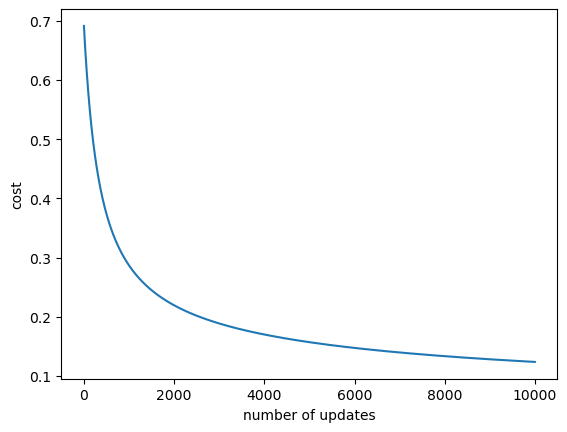

In [31]:
# d) 
weights,intercept = optimizer_f(x,y)
print("Weights:",weights)
print("Intercept:", intercept)

In [32]:
# e) report Final equatoin
names = DF.columns.values.tolist()
print("The final function is:",intercept, end = "")
for i in range(len(weights)-1):
    print(" %f * %s +"%(weights[i],names[i]),end = "")
print(" %f * %s"%(weights[len(weights)-1],names[len(weights)-1]),end = "")

The final function is: 7.596854589203279 -1.143499 * mean radius + -1.309129 * mean texture + -1.246500 * mean perimeter + -1.572077 * mean area + 0.475017 * mean smoothness + -0.719280 * mean compactness + -2.481554 * mean concavity + -3.341136 * mean concave points + 0.411151 * mean symmetry + 2.035527 * mean fractal dimension + -1.646078 * radius error + 0.464264 * texture error + -1.290143 * perimeter error + -1.221812 * area error + 0.598925 * smoothness error + 0.916279 * compactness error + 0.512804 * concavity error + 0.277782 * concave points error + 0.760285 * symmetry error + 0.933723 * fractal dimension error + -2.358209 * worst radius + -2.145802 * worst texture + -2.218349 * worst perimeter + -2.151584 * worst area + -0.984400 * worst smoothness + -1.121341 * worst compactness + -1.783575 * worst concavity + -3.273998 * worst concave points + -1.055647 * worst symmetry + -0.196043 * worst fractal dimension

In [33]:
# f)
# Rank parameters from positive to negative (biggest to smallest)
# 2.03552652 mean fractal dimension
# 0.93372269 fractal dimension error
# 0.91627859 compactness error
# 0.7602846 symmetry error
# 0.5989249 smoothness error
# 0.51280409 concavity error
# 0.4750165 mean smoothness
# 0.46426397 texture error
# 0.41115119 mean symmetry
# 0.27778245 concave points error
# -0.1960431 worst fractal dimension
# -0.71928016 mean compactness
# -0.98440036 worst smoothness
# -1.05564681 worst symmetry
# -1.12134051 worst compactness
# -1.1434992 mean radius
# -1.22181241 area error
# -1.24649986 mean perimeter
# -1.29014345 perimeter error
# -1.30912899 mean texture
# -1.57207726 mean area
# -1.64607791 radius error
# -1.78357458 worst concavity
# -2.14580201 worst texture
# -2.15158438 worst area
# -2.21834932 worst perimeter
# -2.3582086 worst radius
# -2.48155437 mean concavity
# -3.27399809 worst concave points
# -3.34113606 mean concave points

# We can see that there are more coefficients that are more negatively related coefficient to the target than
# positively related ones. 
# Since we have normalized the data, we should see the absolute value of the coefficients
# the bigger the absolute value, the more impact on the target. 
# Top 3 impact on the target are C8, C28, and C7, all negatively related. 
# And the top 3 positively related are C10, C20, C16

In [34]:
# Problem 10

In [35]:
# import dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
DF = california_housing.frame
DF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
# a & b) 
x = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population',
        'AveOccup','Latitude','Longitude']].values
y = DF[['MedHouseVal']].values

In [37]:
# c)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [44]:
# apply LeaveOneOut cross-validation and calculate MSE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
cv = LeaveOneOut()
model = LinearRegression()
y_true = []
y_pred = []
for i,j in cv.split(x):
    x_train = x[i, :]
    x_test = x[j, :]
    y_train = y[i]
    y_test = y[j]
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    y_true.append(y_test[0][0])
    y_pred.append(y_predicted[0][0])
print(mean_squared_error(y_true,y_pred))

20640
0.02245687523556031


In [45]:
# apply KFold cross-validation and calculate MSE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
cv = KFold(shuffle = True, random_state = 265)
model = LinearRegression()
y_true = []
y_pred = []
for i,j in cv.split(x):
    x_train = x[i, :]
    x_test = x[j, :]
    y_train = y[i]
    y_test = y[j]
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    y_true.append(y_test[0][0])
    y_pred.append(y_predicted[0][0])
print(mean_squared_error(y_true,y_pred))

5
0.01065684376084764


In [40]:
# apply Train-test split cross-validation and calculate MSE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 265)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print(mean_squared_error(y_test,y_predicted))

0.023161877546173583


In [41]:
# The MSE of LOOCV is 0.0224569
# The MSE of KFold is 0.0106568
# The MSE of Train-test split is 0.0231619
# We can find that the MSE of KFold is the smallest, and MSE of other two is nearly same.
# The reason of difference between LOOCV and KFold might be that the number of samples to calculate MSE of KFold is only k = 5,
# but the number of samples to calculate MSE of LOOCV is 20640, which will increase MSE.
# And the reason of difference between LOOCV,KFOLD and Train-test split is that there are more trainning data for LOOCV and KFold.